# Análise da Distribuição de Poisson em Processos de Contagem

**Autor:** Jesse Fernandes  
**Data:** 2025-09-29  
**Objetivo**: Exploração rigorosa da distribuição de Poisson e suas aplicações  
**Nível**: PhD/Pesquisa Avançada

## 1. Fundamentação Teórica

### 1.1 Definição da Distribuição de Poisson

A distribuição de Poisson modela a probabilidade de um número específico de eventos ocorrerem em um intervalo fixo de tempo ou espaço, sob as seguintes condições:

1. Os eventos ocorrem independentemente uns dos outros
2. A taxa média de ocorrência é constante
3. Dois eventos não podem ocorrer exatamente ao mesmo tempo

A função de massa de probabilidade (PMF) é definida como:

$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

onde:
- $\lambda$ é o parâmetro de taxa, representando o número médio de eventos no intervalo
- $k$ é o número de ocorrências ($k = 0, 1, 2, \ldots$)
- $e$ é a base do logaritmo natural ($e \approx 2.71828$)

### 1.2 Propriedades Estatísticas

Para uma variável aleatória $X$ com distribuição Poisson($\lambda$):

- $E[X] = \lambda$ (valor esperado)
- $Var[X] = \lambda$ (variância)
- $\sigma_X = \sqrt{\lambda}$ (desvio padrão)
- Coeficiente de assimetria: $\lambda^{-1/2}$
- Curtose excesso: $\lambda^{-1}$

### 1.3 Relações com Outras Distribuições

- **Limite da Binomial**: Quando $n \to \infty$, $p \to 0$, e $np = \lambda$ (constante), a distribuição Binomial($n$, $p$) se aproxima da Poisson($\lambda$)
- **Relacionamento com Exponencial**: Se os eventos seguem processo de Poisson com taxa $\lambda$, então o tempo entre eventos consecutivos segue distribuição Exponencial com parâmetro $\lambda$
- **Aproximação Normal**: Para $\lambda$ grande ($\lambda > 10$), Poisson($\lambda$) $\approx$ Normal($\mu=\lambda$, $\sigma^2=\lambda$)

## 2. Configuração do Ambiente Científico

In [1]:
# Configuração do ambiente científico
import os
import sys
from pathlib import Path

# Configuração do projeto
project_root = Path(os.getcwd()).parent.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Imports científicos essenciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import poisson, binom, norm, expon
import warnings

# Configurações de reprodutibilidade
np.random.seed(42)
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Configurações de visualização profissional
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.figsize': (14, 8),
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'axes.grid': True,
    'grid.alpha': 0.3
})

print("✅ Ambiente científico configurado")
print(f"NumPy: {np.__version__}")
print(f"SciPy: {stats.__version__ if hasattr(stats, '__version__') else 'N/A'}")
print(f"Pandas: {pd.__version__}")

✅ Ambiente científico configurado
NumPy: 2.3.3
SciPy: N/A
Pandas: 2.3.2


## 3. Análise Teórica e Visualizações

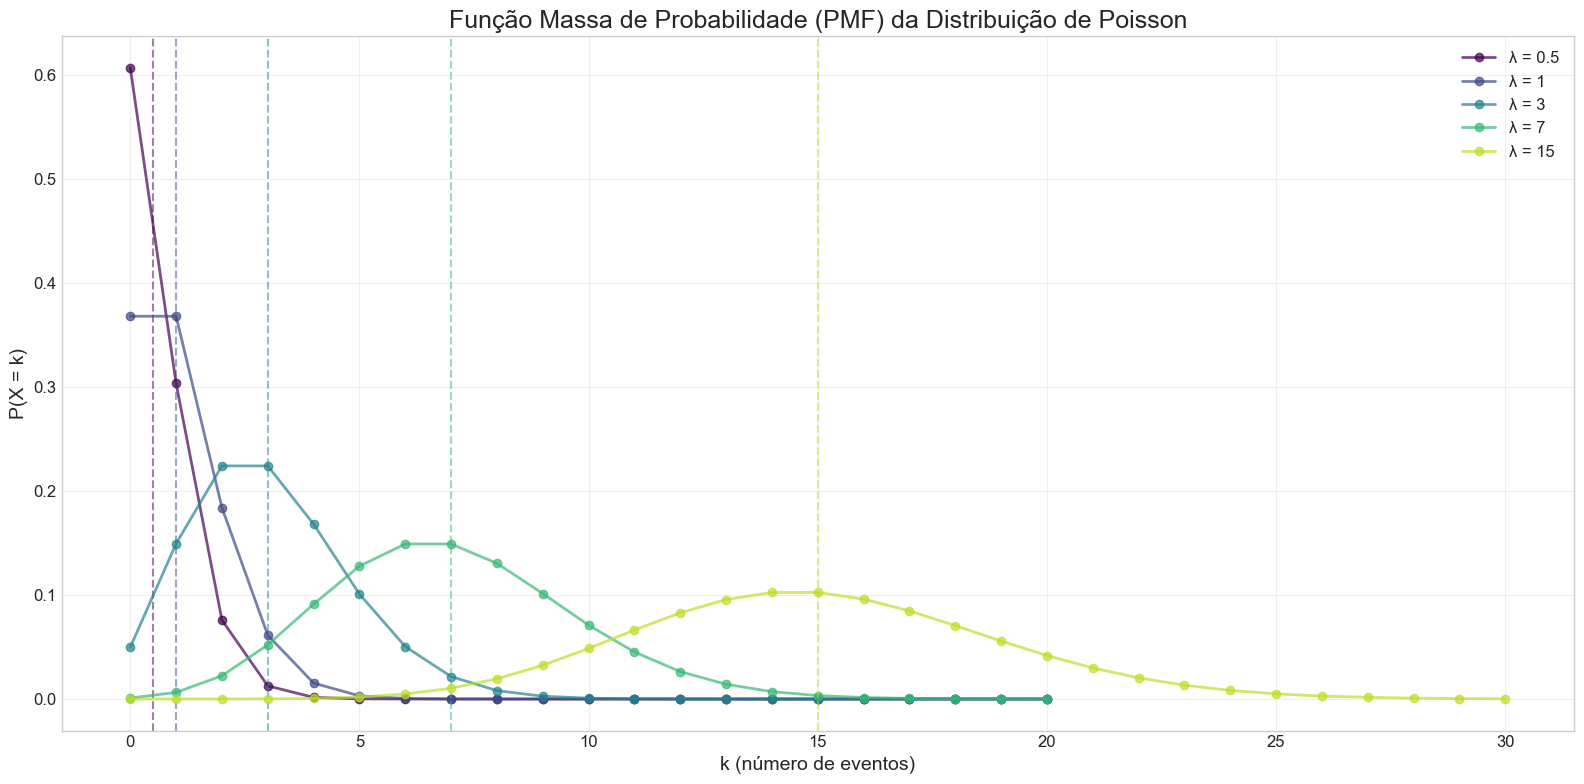

In [2]:
class PoissonAnalyzer:
    """Classe para análise rigorosa da distribuição de Poisson."""
    
    def __init__(self, lambda_values=None):
        """Inicializa o analisador com valores específicos de lambda."""
        self.lambda_values = lambda_values or [0.5, 1, 3, 5, 10, 15]
        self.colors = plt.cm.viridis(np.linspace(0, 0.9, len(self.lambda_values)))
        
    def calculate_pmf(self, lam, k_range=None):
        """Calcula função massa de probabilidade para um lambda específico."""
        if k_range is None:
            k_max = max(20, int(lam + 4*np.sqrt(lam)))
            k_range = np.arange(0, k_max + 1)
        return k_range, poisson.pmf(k_range, lam)
    
    def visualize_pmf(self):
        """Gera visualização da PMF para diferentes valores de lambda."""
        fig, ax = plt.subplots(figsize=(16, 8))
        
        for i, lam in enumerate(self.lambda_values):
            k_range, pmf = self.calculate_pmf(lam)
            ax.plot(k_range, pmf, '-o', markersize=6, linewidth=2, alpha=0.7,
                    color=self.colors[i], label=f'λ = {lam}')
            
            # Marcar valor médio
            ax.axvline(x=lam, color=self.colors[i], linestyle='--', alpha=0.5)
        
        ax.set_xlabel('k (número de eventos)')
        ax.set_ylabel('P(X = k)')
        ax.set_title('Função Massa de Probabilidade (PMF) da Distribuição de Poisson', fontsize=18)
        ax.legend(loc='best')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    def visualize_cdf(self):
        """Gera visualização da CDF para diferentes valores de lambda."""
        fig, ax = plt.subplots(figsize=(16, 8))
        
        for i, lam in enumerate(self.lambda_values):
            k_max = max(20, int(lam + 4*np.sqrt(lam)))
            k_range = np.arange(0, k_max + 1)
            cdf = poisson.cdf(k_range, lam)
            ax.step(k_range, cdf, linewidth=2.5, where='post', 
                   color=self.colors[i], label=f'λ = {lam}')
            
            # Marcar mediana (aproximação)
            median_approx = int(lam + 1/3 - 0.02/lam)
            ax.axvline(x=median_approx, color=self.colors[i], linestyle=':', alpha=0.5)
        
        ax.set_xlabel('k (número de eventos)')
        ax.set_ylabel('P(X ≤ k)')
        ax.set_title('Função de Distribuição Acumulada (CDF) da Distribuição de Poisson', fontsize=18)
        ax.legend(loc='best')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def compare_with_binomial(self):
        """Compara a aproximação da Binomial pela Poisson."""
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))
        axes = axes.flatten()
        
        # Casos de comparação: (n, p, lambda)
        comparison_cases = [
            (20, 0.1, 2),    # n pequeno
            (50, 0.1, 5),    # n médio
            (100, 0.05, 5),  # n grande, mesmo lambda
            (1000, 0.01, 10) # n muito grande
        ]
        
        for i, (n, p, lam) in enumerate(comparison_cases):
            k_range = np.arange(0, max(20, int(lam + 4*np.sqrt(lam))))
            
            # PMF Binomial
            binom_pmf = binom.pmf(k_range, n, p)
            
            # PMF Poisson com lambda = np
            poisson_pmf = poisson.pmf(k_range, lam)
            
            # Plotar
            axes[i].plot(k_range, binom_pmf, 'bo-', alpha=0.7, label=f'Binomial(n={n}, p={p})')
            axes[i].plot(k_range, poisson_pmf, 'r--', linewidth=2, label=f'Poisson(λ={lam})')
            
            # Calcular erro máximo
            max_error = np.max(np.abs(binom_pmf - poisson_pmf))
            axes[i].set_title(f'Comparação: n={n}, p={p}, λ={lam}\nErro Máximo: {max_error:.5f}')
            axes[i].set_xlabel('k (número de eventos)')
            axes[i].set_ylabel('Probabilidade')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle('Aproximação Binomial → Poisson: Quando n → ∞, p → 0, np = λ (constante)', fontsize=20)
        plt.tight_layout()
        plt.subplots_adjust(top=0.93)
        plt.show()
    
    def compare_with_normal(self):
        """Compara a aproximação da Poisson pela Normal para lambda grandes."""
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))
        axes = axes.flatten()
        
        # Valores de lambda para comparação
        lambda_values = [1, 5, 10, 30]
        
        for i, lam in enumerate(lambda_values):
            # Definir range adequado
            k_max = int(lam + 4*np.sqrt(lam))
            k_min = max(0, int(lam - 4*np.sqrt(lam)))
            k_range = np.arange(k_min, k_max + 1)
            
            # PMF Poisson
            poisson_pmf = poisson.pmf(k_range, lam)
            
            # PDF Normal (contínua)
            x = np.linspace(k_min - 0.5, k_max + 0.5, 1000)
            normal_pdf = norm.pdf(x, loc=lam, scale=np.sqrt(lam))
            
            # Plotar
            axes[i].plot(k_range, poisson_pmf, 'bo', markersize=8, alpha=0.7, label=f'Poisson(λ={lam})')
            axes[i].plot(x, normal_pdf, 'r-', linewidth=2, label=f'Normal(μ={lam}, σ²={lam})')
            
            # Calcular estatísticas
            if lam >= 10:
                # Para lambda grandes, calcular o erro da aproximação
                # Corrigindo continuidade
                normal_corrected = [norm.cdf(k+0.5, loc=lam, scale=np.sqrt(lam)) - 
                                   norm.cdf(k-0.5, loc=lam, scale=np.sqrt(lam)) for k in k_range]
                max_error = np.max(np.abs(poisson_pmf - normal_corrected))
                quality = "Boa" if max_error < 0.01 else "Razoável"
                axes[i].set_title(f'λ={lam}: Aproximação {quality} (Erro máx: {max_error:.4f})')
            else:
                axes[i].set_title(f'λ={lam}: Aproximação inadequada para λ pequeno')
                
            axes[i].set_xlabel('k (número de eventos)')
            axes[i].set_ylabel('Probabilidade')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle('Aproximação Poisson → Normal: Quando λ é grande (λ > 10)', fontsize=20)
        plt.tight_layout()
        plt.subplots_adjust(top=0.93)
        plt.show()

# Criar e utilizar o analisador
analyzer = PoissonAnalyzer(lambda_values=[0.5, 1, 3, 7, 15])
analyzer.visualize_pmf()

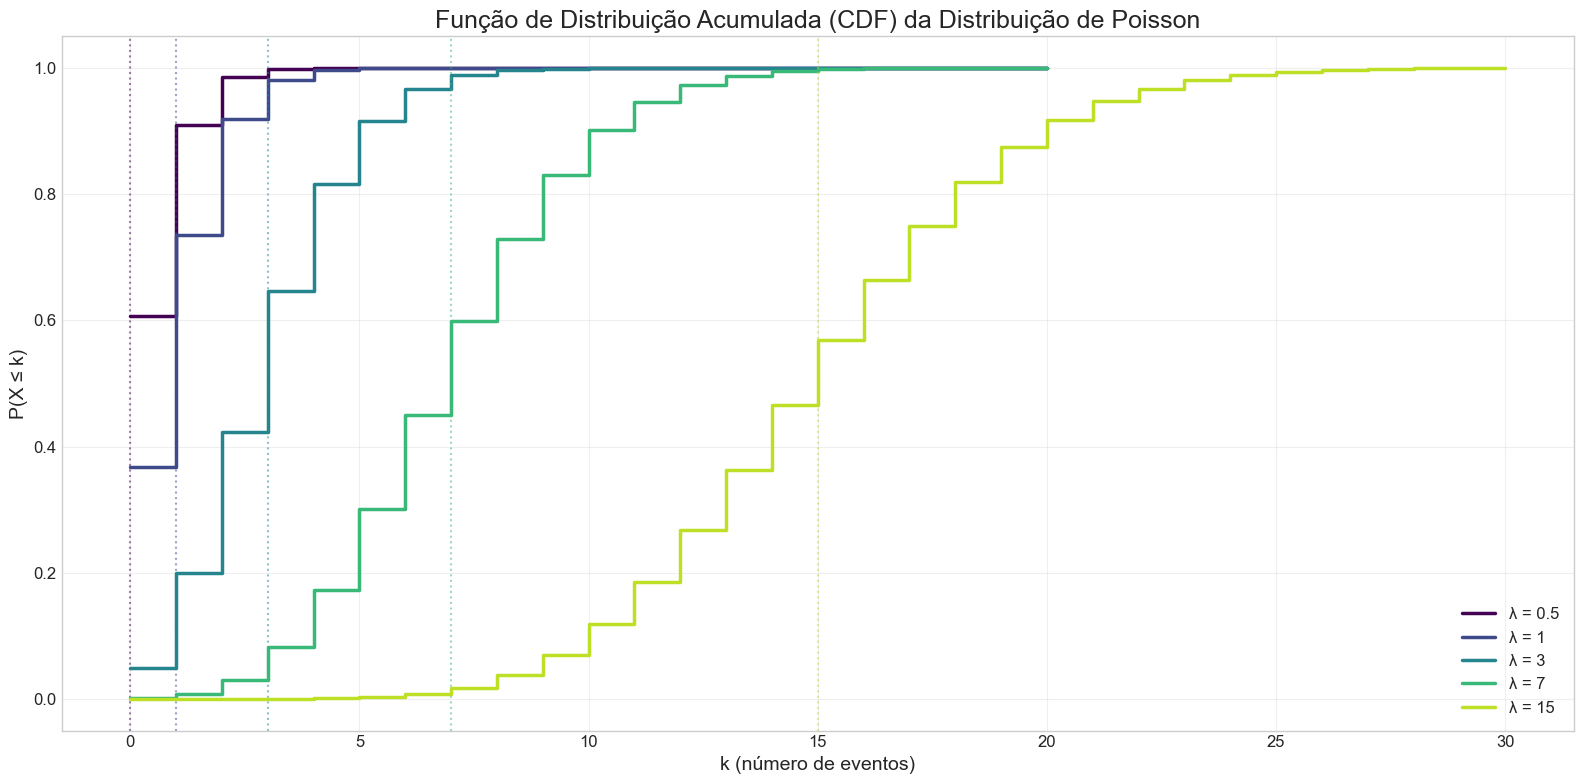

In [3]:
# Visualizar função de distribuição acumulada
analyzer.visualize_cdf()

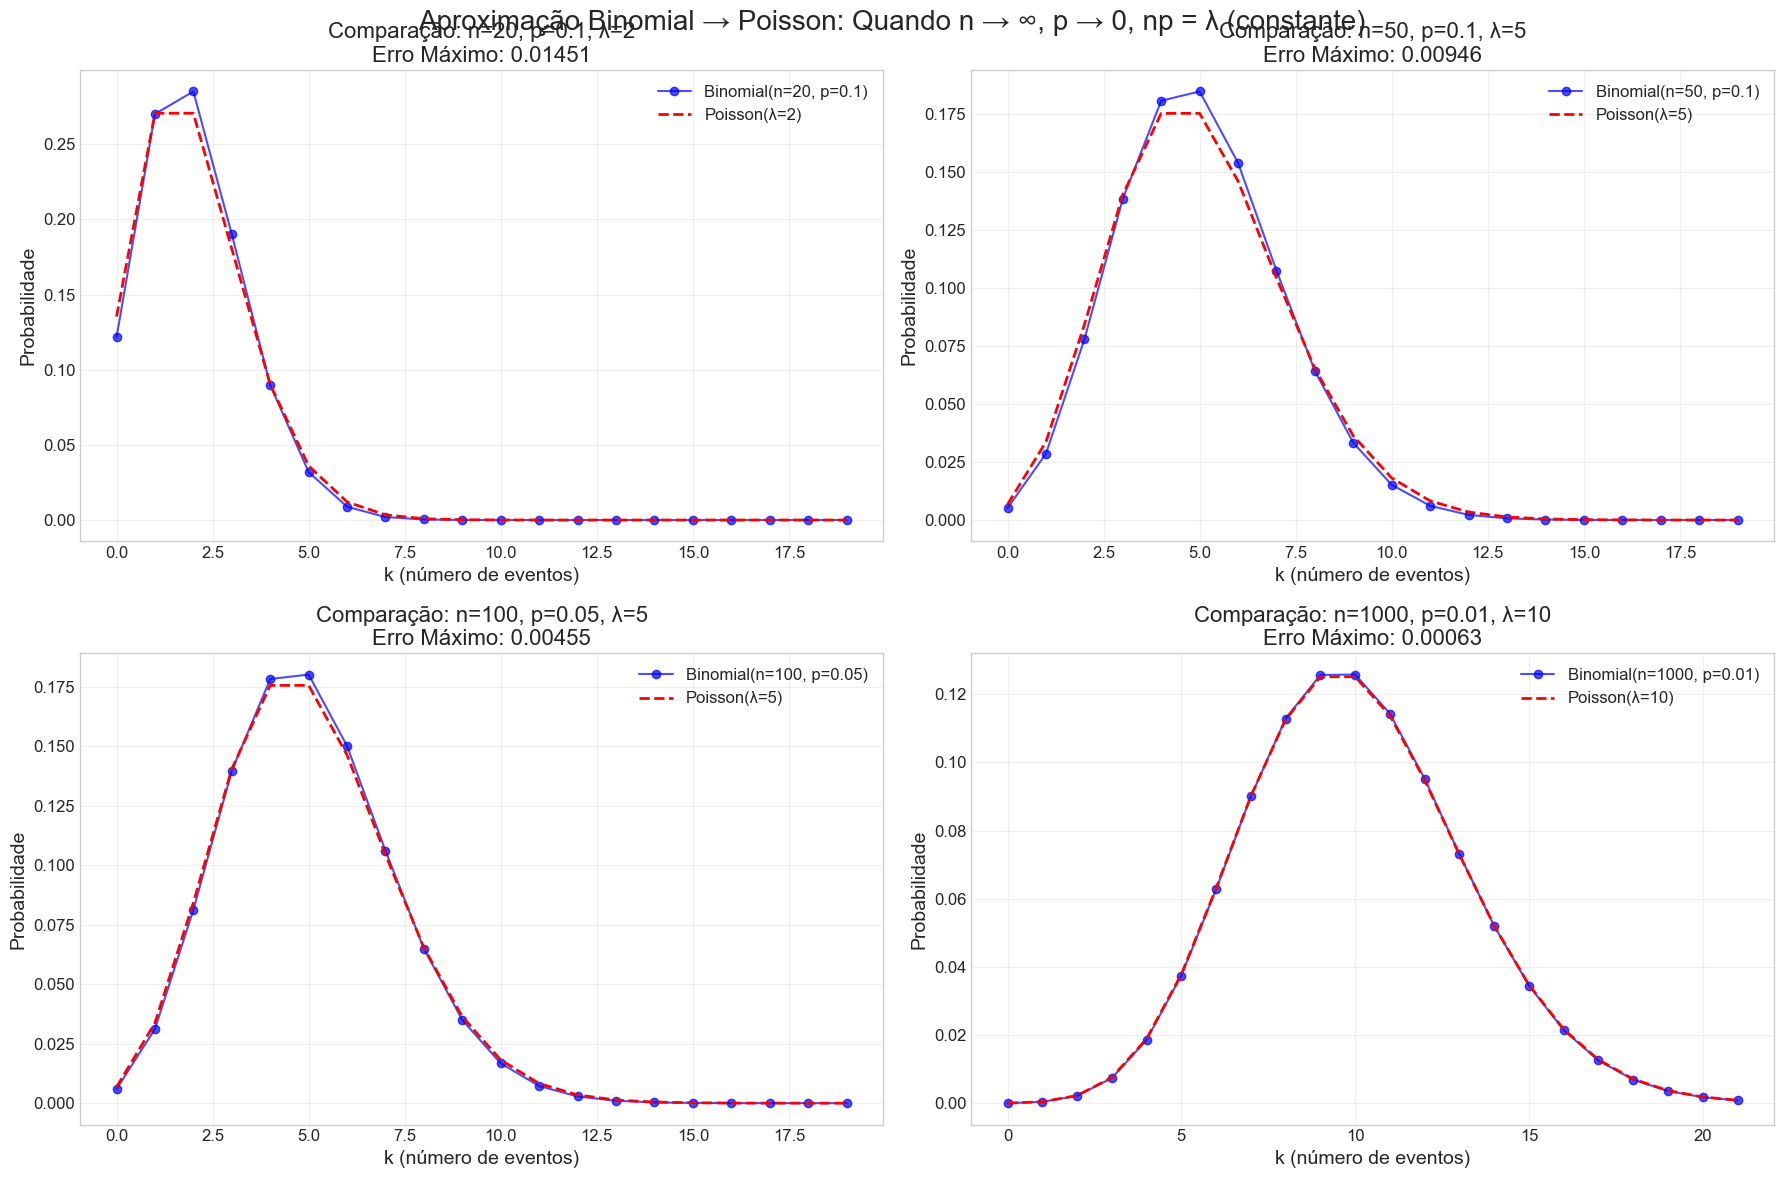

In [4]:
# Comparação entre Binomial e Poisson
analyzer.compare_with_binomial()

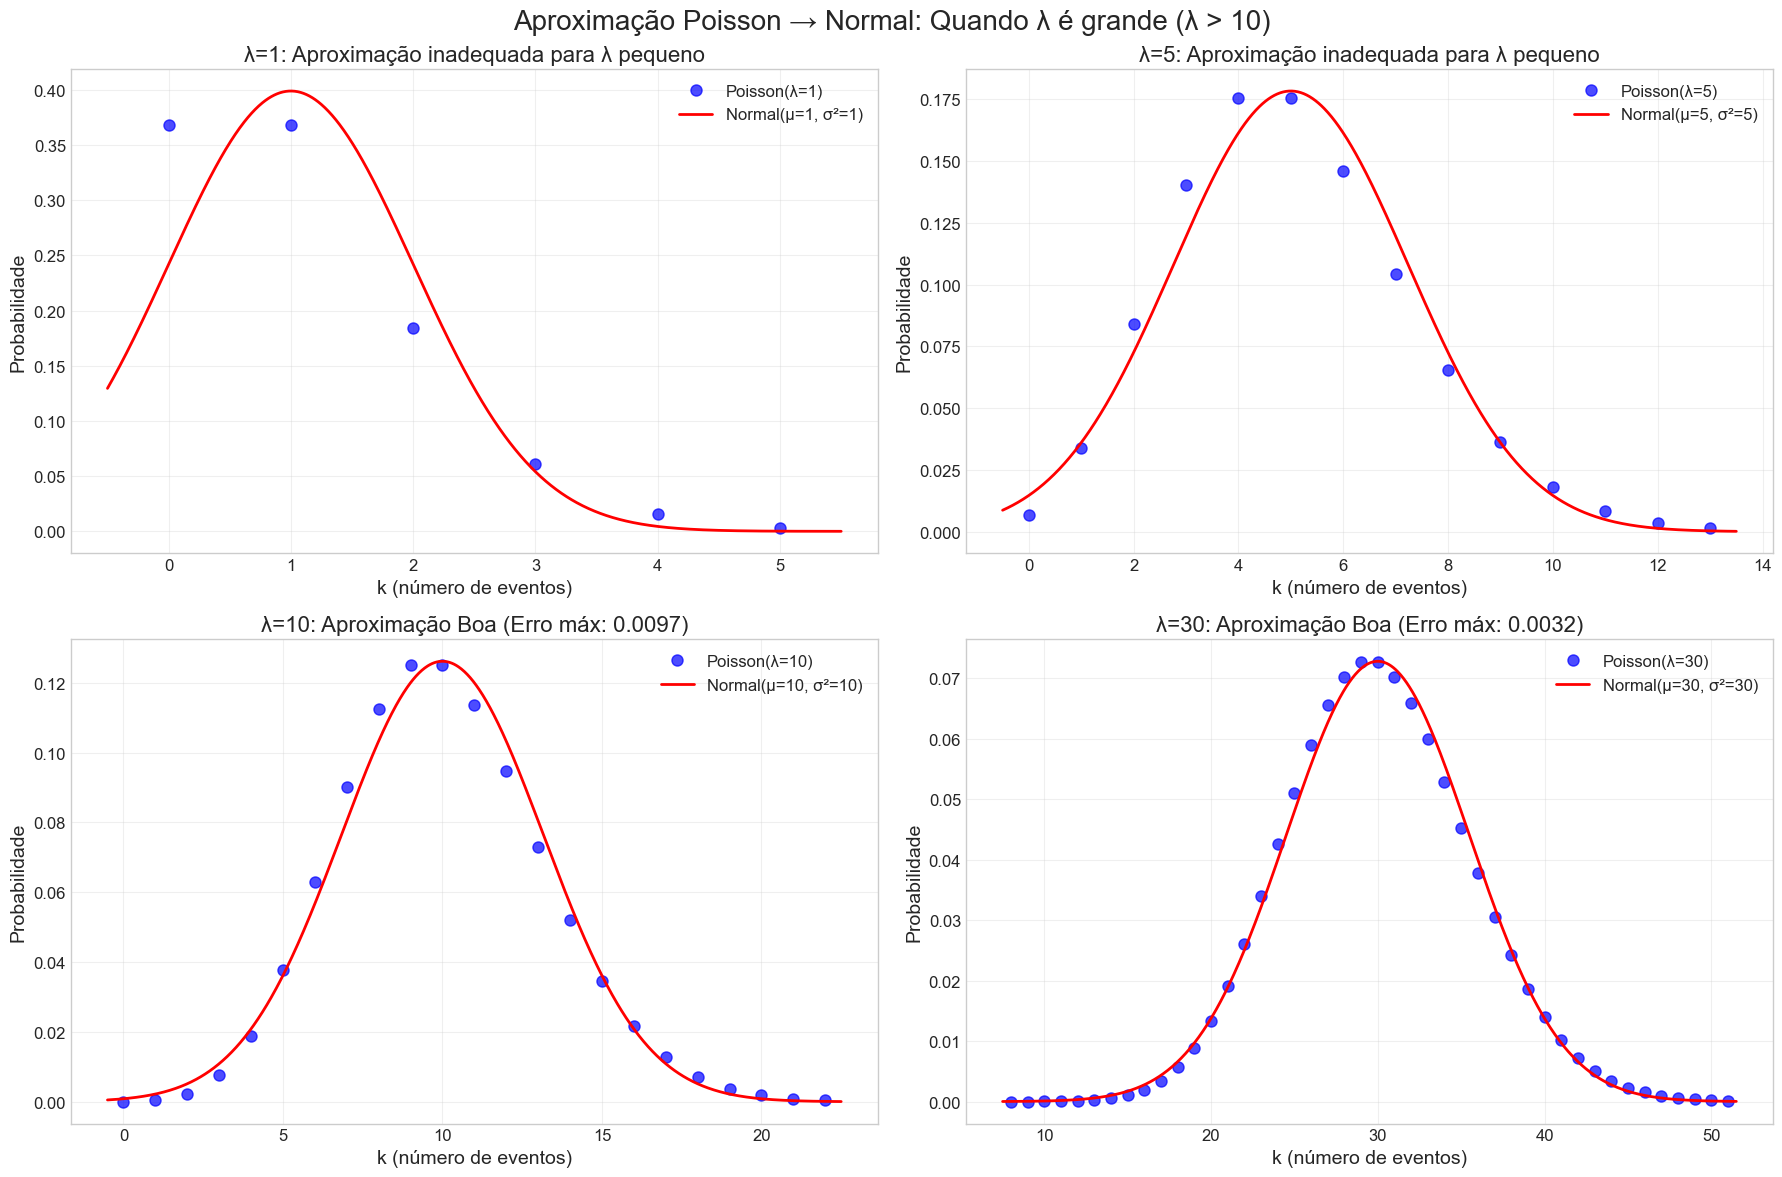

In [5]:
# Comparação entre Poisson e Normal
analyzer.compare_with_normal()

## 4. Processos de Contagem

A distribuição de Poisson está intimamente relacionada ao processo de Poisson, que modela eventos que ocorrem continuamente e independentemente a uma taxa constante. Este processo tem as seguintes propriedades fundamentais:

1. **Incrementos independentes**: O número de eventos em intervalos disjuntos são variáveis independentes
2. **Incrementos estacionários**: A distribuição do número de eventos depende apenas do tamanho do intervalo, não de sua posição
3. **Probabilidade única**: A probabilidade de exatamente um evento em um intervalo infinitesimal é proporcional ao tamanho do intervalo
4. **Ausência de eventos simultâneos**: Apenas um evento pode ocorrer a qualquer momento

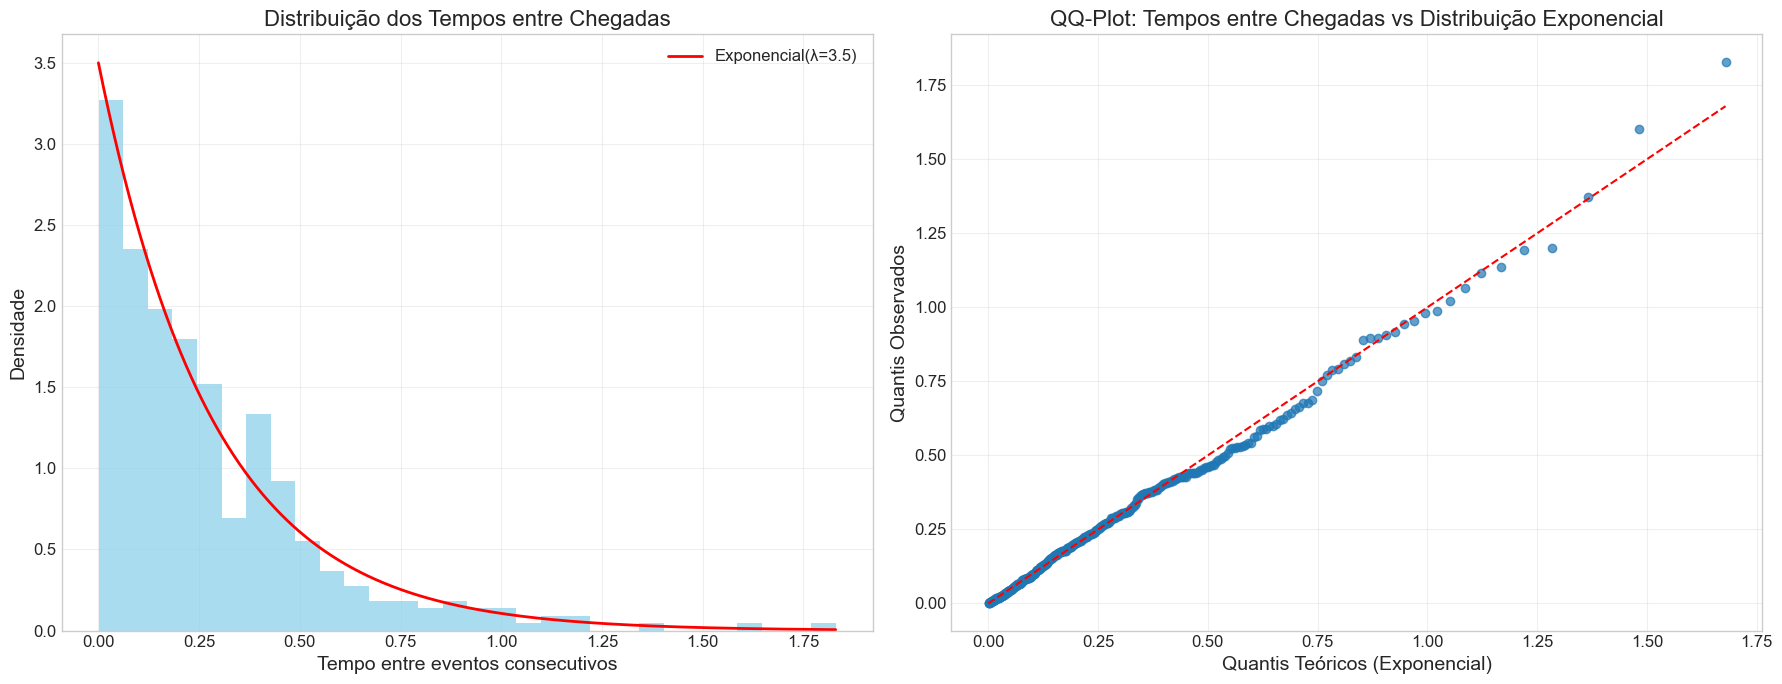


Estatísticas dos Tempos entre Chegadas:
Número de chegadas: 357
Tempo médio entre chegadas: 0.2788 (teórico: 0.2857)
Desvio padrão: 0.2733 (teórico: 0.2857)

Teste Kolmogorov-Smirnov:
Estatística KS: 0.0307
p-valor: 0.8806
Conclusão: Não rejeitar hipótese de distribuição Exponencial (α=0.05)


In [9]:
class PoissonProcess:
    """Classe para simulação e análise de processos de Poisson."""
    
    def __init__(self, rate, time_max=100):
        """Inicializa o processo com uma taxa específica.
        
        Parameters:
        -----------
        rate : float
            Taxa de ocorrência de eventos (λ) por unidade de tempo
        time_max : float
            Tempo máximo para simulação
        """
        self.rate = rate
        self.time_max = time_max
    
    def simulate_times(self):
        """Simula os tempos de chegada em um processo de Poisson."""
        # Inicializar lista de tempos
        times = []
        
        # Tempo atual
        current_time = 0
        
        # Simular até atingir time_max
        while current_time < self.time_max:
            # Tempo até o próximo evento segue Exponencial(λ)
            next_interval = np.random.exponential(1/self.rate)
            current_time += next_interval
            
            if current_time < self.time_max:
                times.append(current_time)
        
        return np.array(times)
    
    def simulate_counts(self, num_intervals=100):
        """Simula contagens em intervalos iguais de tempo."""
        interval_size = self.time_max / num_intervals
        arrival_times = self.simulate_times()
        
        # Contar eventos em cada intervalo
        intervals = np.arange(0, self.time_max, interval_size)
        counts = np.zeros(len(intervals))
        
        for t in arrival_times:
            interval_idx = int(t / interval_size)
            if interval_idx < len(counts):
                counts[interval_idx] += 1
                
        return intervals, counts
    
    def analyze_interarrival_times(self):
        """Analisa os tempos entre chegadas."""
        arrival_times = self.simulate_times()
        interarrival_times = np.diff(arrival_times)
        
        fig, axes = plt.subplots(1, 2, figsize=(18, 7))
        
        # Histograma de tempos entre chegadas
        axes[0].hist(interarrival_times, bins=30, density=True, alpha=0.7, color='skyblue')
        
        # Sobreposição da PDF exponencial teórica
        x = np.linspace(0, max(interarrival_times), 1000)
        y = expon.pdf(x, scale=1/self.rate)
        axes[0].plot(x, y, 'r-', linewidth=2, 
                    label=f'Exponencial(λ={self.rate})')
        
        axes[0].set_title('Distribuição dos Tempos entre Chegadas')
        axes[0].set_xlabel('Tempo entre eventos consecutivos')
        axes[0].set_ylabel('Densidade')
        axes[0].legend()
        
        # QQ-plot para verificação de ajuste
        theoretical_quantiles = expon.ppf(np.arange(1, len(interarrival_times) + 1) / (len(interarrival_times) + 1), 
                                        scale=1/self.rate)
        observed_quantiles = np.sort(interarrival_times)
        
        axes[1].scatter(theoretical_quantiles, observed_quantiles, alpha=0.7)
        axes[1].plot([0, max(theoretical_quantiles)], [0, max(theoretical_quantiles)], 'r--')
        axes[1].set_title('QQ-Plot: Tempos entre Chegadas vs Distribuição Exponencial')
        axes[1].set_xlabel('Quantis Teóricos (Exponencial)')
        axes[1].set_ylabel('Quantis Observados')
        
        plt.tight_layout()
        plt.show()
        
        # Estatísticas descritivas
        print("\nEstatísticas dos Tempos entre Chegadas:")
        print(f"Número de chegadas: {len(arrival_times)}")
        print(f"Tempo médio entre chegadas: {np.mean(interarrival_times):.4f} (teórico: {1/self.rate:.4f})")
        print(f"Desvio padrão: {np.std(interarrival_times):.4f} (teórico: {1/self.rate:.4f})")
        
        # Teste de ajuste
        from scipy.stats import kstest
        ks_stat, p_value = kstest(interarrival_times, 'expon', args=(0, 1/self.rate))
        print(f"\nTeste Kolmogorov-Smirnov:")
        print(f"Estatística KS: {ks_stat:.4f}")
        print(f"p-valor: {p_value:.4f}")
        print(f"Conclusão: {'Não rejeitar' if p_value > 0.05 else 'Rejeitar'} hipótese de distribuição Exponencial (α=0.05)")
    
    def analyze_count_distribution(self, interval_size=1):
        """Analisa a distribuição das contagens em intervalos fixos."""
        num_intervals = int(self.time_max / interval_size)
        intervals, counts = self.simulate_counts(num_intervals)
        
        fig, axes = plt.subplots(1, 2, figsize=(18, 7))
        
        # Histograma de contagens
        max_count = int(max(counts))
        bins = np.arange(-0.5, max_count + 1.5, 1)  # Centralizado nos inteiros
        
        axes[0].hist(counts, bins=bins, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
        
        # Sobreposição da PMF Poisson teórica
        x_range = np.arange(0, max_count + 1)
        y = poisson.pmf(x_range, self.rate * interval_size)
        axes[0].plot(x_range, y, 'bo-', markersize=6, linewidth=1.5, alpha=0.7,
                    label=f'Poisson(λ={self.rate * interval_size:.2f})')
        
        axes[0].set_title(f'Distribuição de Contagens em Intervalos de {interval_size} unidades')
        axes[0].set_xlabel('Número de eventos por intervalo')
        axes[0].set_ylabel('Frequência')
        axes[0].legend()
        
        # Visualizar processo ao longo do tempo
        arrival_times = self.simulate_times()
        cumulative_events = np.arange(1, len(arrival_times) + 1)
        
        axes[1].plot(arrival_times, cumulative_events, 'b-', linewidth=2)
        axes[1].plot([0, self.time_max], [0, self.rate * self.time_max], 'r--', 
                    label=f'Expectativa: N(t) = λt = {self.rate}t')
        
        axes[1].set_title('Processo de Contagem de Poisson')
        axes[1].set_xlabel('Tempo')
        axes[1].set_ylabel('Número cumulativo de eventos')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
        
        # Estatísticas das contagens
        print("\nEstatísticas das Contagens por Intervalo:")
        print(f"Média observada: {np.mean(counts):.4f} (teórico: {self.rate * interval_size:.4f})")
        print(f"Variância observada: {np.var(counts):.4f} (teórico: {self.rate * interval_size:.4f})")
        
        # Teste de ajuste
        from scipy.stats import chisquare
        
        # Agrupar para garantir frequências esperadas >= 5
        obs_counts = np.bincount(counts.astype(int))
        k_range = np.arange(len(obs_counts))
        exp_probs = poisson.pmf(k_range, self.rate * interval_size)
        
        # Garantir que as frequências esperadas tenham a mesma soma que as observadas
        total_obs = len(counts)
        exp_counts = exp_probs * total_obs
        
        # Combinar categorias com baixa contagem esperada
        mask = exp_counts >= 5
        if not all(mask) and len(mask) > 1:
            # Encontrar o primeiro índice abaixo de 5
            cutoff_indices = np.where(~mask)[0]
            if len(cutoff_indices) > 0:
                cutoff = cutoff_indices[0]
                
                # Certifique-se de que cutoff é válido
                cutoff = max(1, min(cutoff, len(obs_counts) - 1))
                
                # Condensar
                obs_tail = sum(obs_counts[cutoff:])
                exp_tail = sum(exp_counts[cutoff:])
                
                obs_counts = np.append(obs_counts[:cutoff], obs_tail)
                exp_counts = np.append(exp_counts[:cutoff], exp_tail)
        
        # Verificar e ajustar para garantir que as somas sejam idênticas
        # (isso é necessário para o teste qui-quadrado)
        if abs(sum(obs_counts) - sum(exp_counts)) > 1e-10:
            # Normalizar as frequências esperadas para que somem igual às observadas
            exp_counts = exp_counts * (sum(obs_counts) / sum(exp_counts))
        
        try:
            # Agora tenta realizar o teste qui-quadrado
            chi2_stat, p_value = chisquare(obs_counts, exp_counts)
            
            print(f"\nTeste Qui-quadrado:")
            print(f"Estatística χ²: {chi2_stat:.4f}")
            print(f"p-valor: {p_value:.4f}")
            print(f"Conclusão: {'Não rejeitar' if p_value > 0.05 else 'Rejeitar'} hipótese de distribuição Poisson (α=0.05)")
        except Exception as e:
            print(f"\nNão foi possível realizar o teste qui-quadrado: {str(e)}")
            print("Certifique-se de que há dados suficientes para o teste e que as categorias foram devidamente combinadas.")

# Criar e utilizar o simulador de processo de Poisson
process = PoissonProcess(rate=3.5, time_max=100)
process.analyze_interarrival_times()

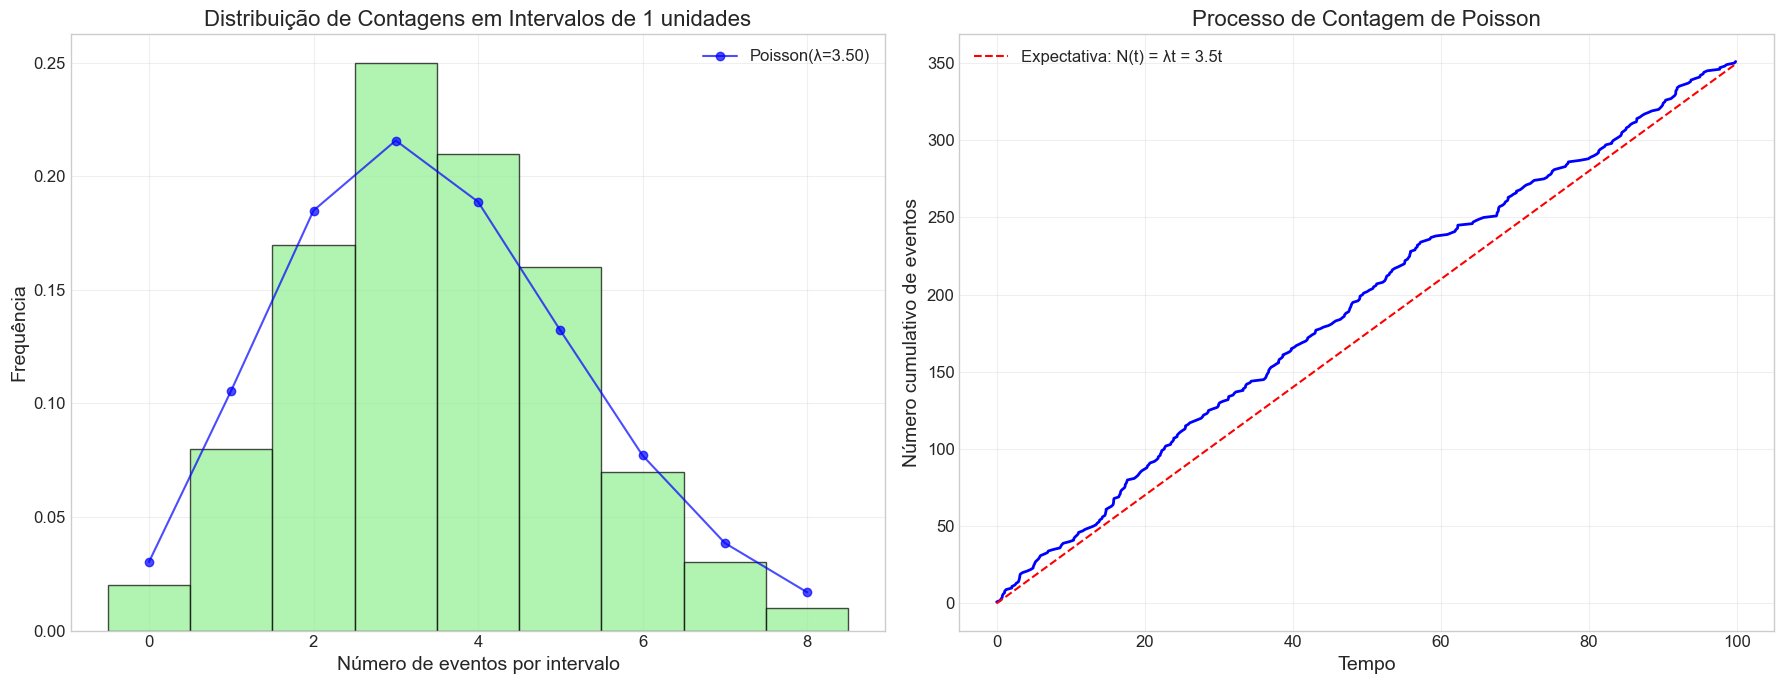


Estatísticas das Contagens por Intervalo:
Média observada: 3.5200 (teórico: 3.5000)
Variância observada: 2.6096 (teórico: 3.5000)

Teste Qui-quadrado:
Estatística χ²: 0.3728
p-valor: 0.5415
Conclusão: Não rejeitar hipótese de distribuição Poisson (α=0.05)


In [12]:
# Análise da distribuição de contagens
process.analyze_count_distribution(interval_size=1)

## 5. Aplicação em Dados Reais: Análise de Chamados de Serviço

In [15]:
# Vamos criar um conjunto de dados sintético baseado em uma série de chamados
# de serviço 311 (não emergenciais) em uma cidade

try:
    # Tentar carregar dados reais (se disponíveis)
    nyc_data = pd.read_csv(os.path.join(project_root, 'data', 'external', 'nyc_311.csv'))
    print("Dados NYC 311 carregados com sucesso!")
    use_real_data = True
    
    # Processar dados reais
    # Aqui você poderia processar os dados do NYC como desejar
    # Por simplicidade, vamos criar um DataFrame semelhante ao sintético
    # Suponhamos que nyc_data tenha colunas como 'Created Date', 'Complaint Type', etc.
    
    # Extrair os primeiros registros para demonstração
    if 'Complaint Type' in nyc_data.columns:
        # Se os dados reais tiverem a estrutura esperada
        sample_data = nyc_data.sample(100)  # Usar uma amostra dos dados
        calls_df = pd.DataFrame({
            'Dia': range(1, len(sample_data) + 1),  # Simplificação para demonstração
            'Categoria': sample_data['Complaint Type'],
            'Contagem': 1  # Cada registro representa uma ocorrência
        })
        # Agregar contagens por dia e categoria
        calls_df = calls_df.groupby(['Dia', 'Categoria']).sum().reset_index()
    else:
        # Se os dados não tiverem a estrutura esperada, criar dados sintéticos
        use_real_data = False
        raise ValueError("Estrutura de dados não compatível")
        
except Exception as e:
    print(f"Dados reais não disponíveis ou incompatíveis. Gerando dados sintéticos... ({str(e)})")
    use_real_data = False
    
    # Gerar dados sintéticos
    np.random.seed(42)
    
    # Parâmetros do modelo
    n_days = 30  # Um mês de dados
    
    # Taxas diárias de chamados por categoria (média)
    categories = [
        'Ruído', 
        'Problemas de encanamento', 
        'Problemas elétricos',
        'Coleta de lixo',
        'Limpeza de ruas'
    ]
    
    # Taxas por categoria (lambda)
    category_rates = {
        'Ruído': 12,
        'Problemas de encanamento': 8, 
        'Problemas elétricos': 5,
        'Coleta de lixo': 15,
        'Limpeza de ruas': 7
    }
    
    # Gerar contagens diárias por categoria
    data = []
    
    for day in range(1, n_days + 1):
        for category in categories:
            # Introduzir alguma variabilidade nas taxas
            rate = category_rates[category] * (0.9 + 0.2 * np.random.random())
            
            # Gerar contagem de chamados usando Poisson
            count = np.random.poisson(rate)
            
            data.append({
                'Dia': day,
                'Categoria': category,
                'Contagem': count
            })
    
    # Criar DataFrame
    calls_df = pd.DataFrame(data)

# Mostrar os primeiros registros
print("\nPrimeiros registros do conjunto de dados:")
display(calls_df.head(10))

# Estatísticas por categoria
summary = calls_df.groupby('Categoria')['Contagem'].agg(['mean', 'var', 'std']).reset_index()
summary['var/mean'] = summary['var'] / summary['mean']

print("\nEstatísticas por categoria:")
display(summary)

Dados NYC 311 carregados com sucesso!
Dados reais não disponíveis ou incompatíveis. Gerando dados sintéticos... (Estrutura de dados não compatível)

Primeiros registros do conjunto de dados:


,Dia,Categoria,Contagem
0,1,Ruído,19
1,1,Problemas de encanamento,6
2,1,Problemas elétricos,4
3,1,Coleta de lixo,14
4,1,Limpeza de ruas,6
5,2,Ruído,8
6,2,Problemas de encanamento,8
7,2,Problemas elétricos,5
8,2,Coleta de lixo,22
9,2,Limpeza de ruas,3



Estatísticas por categoria:


,Categoria,mean,var,std,var/mean
0,Coleta de lixo,14.500000,19.844828,4.454753,1.368609
1,Limpeza de ruas,7.566667,7.081609,2.661129,0.935895
2,Problemas de encanamento,7.566667,7.426437,2.725149,0.981467
3,Problemas elétricos,4.033333,3.205747,1.790460,0.794813
4,Ruído,11.766667,14.736782,3.838852,1.252418



Análise para todas categorias:
Média: 9.0867
Variância: 23.4392
Razão Variância/Média: 2.5795


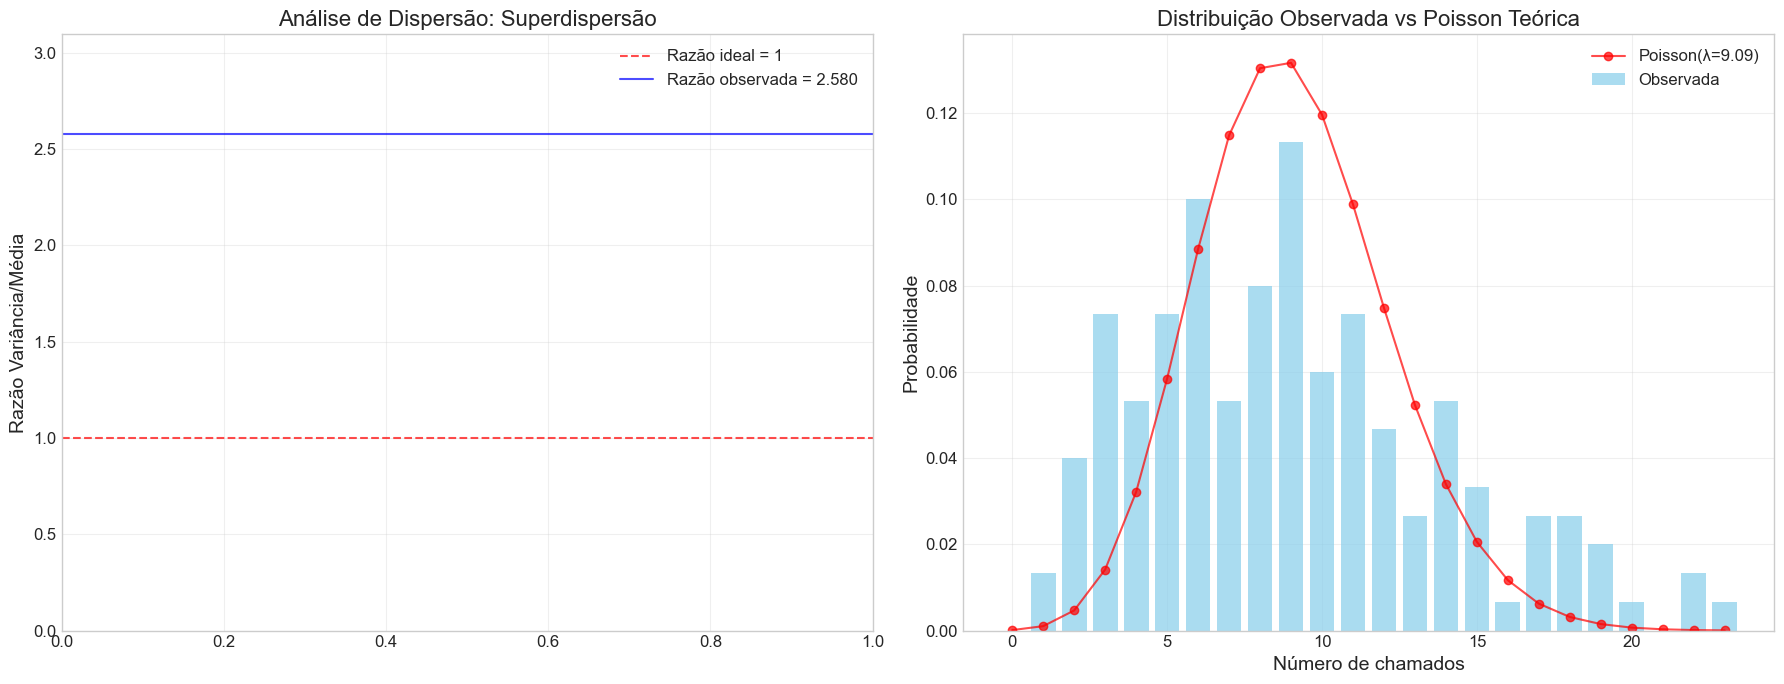


Teste Qui-quadrado de adequação:
Estatística χ²: 0.0170
GL: 0
p-valor: 0.8963
Conclusão: Não rejeitar o modelo Poisson (α=0.05)


np.float64(2.579510882856445)

In [16]:
class PoissonModelTester:
    """Classe para testar ajuste do modelo de Poisson em dados reais."""
    
    def __init__(self, data, count_column, category_column=None):
        """Inicializa o testador com dados observados."""
        self.data = data
        self.count_column = count_column
        self.category_column = category_column
    
    def test_poisson_assumptions(self, category=None):
        """Testa as principais suposições do modelo de Poisson."""
        if category is not None and self.category_column is not None:
            data = self.data[self.data[self.category_column] == category].copy()
        else:
            data = self.data.copy()
        
        counts = data[self.count_column].values
        
        # 1. Calcular estatísticas básicas
        mean_count = np.mean(counts)
        var_count = np.var(counts)
        ratio = var_count / mean_count
        
        print(f"\nAnálise para {'todas categorias' if category is None else category}:")
        print(f"Média: {mean_count:.4f}")
        print(f"Variância: {var_count:.4f}")
        print(f"Razão Variância/Média: {ratio:.4f}")
        
        # 2. Gráfico de dispersão: Média vs Variância para verificar equidispersão
        fig, axes = plt.subplots(1, 2, figsize=(18, 7))
        
        axes[0].axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Razão ideal = 1')
        axes[0].axhline(y=ratio, color='b', linestyle='-', alpha=0.7, 
                       label=f'Razão observada = {ratio:.3f}')
        
        if ratio < 0.8:
            dispersion = "Subdispersão"
        elif ratio > 1.2:
            dispersion = "Superdispersão"
        else:
            dispersion = "Equidispersão (bom ajuste para Poisson)"
            
        axes[0].set_title(f"Análise de Dispersão: {dispersion}")
        axes[0].set_ylabel('Razão Variância/Média')
        axes[0].set_ylim(0, max(2, ratio * 1.2))
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # 3. Comparação da distribuição empírica com a teórica
        obs_counts = np.bincount(counts.astype(int))
        k_range = np.arange(len(obs_counts))
        
        # PMF teórica
        poisson_pmf = poisson.pmf(k_range, mean_count)
        exp_counts = poisson_pmf * len(counts)
        
        axes[1].bar(k_range, obs_counts / len(counts), alpha=0.7, width=0.8, 
                   color='skyblue', label='Observada')
        axes[1].plot(k_range, poisson_pmf, 'ro-', markersize=6, alpha=0.7, 
                    label=f'Poisson(λ={mean_count:.2f})')
        
        axes[1].set_title(f"Distribuição Observada vs Poisson Teórica")
        axes[1].set_xlabel('Número de chamados')
        axes[1].set_ylabel('Probabilidade')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 4. Teste qui-quadrado de adequação
        # Combinar categorias com baixa contagem esperada
        mask = exp_counts >= 5
        if not all(mask) and len(exp_counts) > 1:
            cutoff_indices = np.where(~mask)[0]
            if len(cutoff_indices) > 0:
                cutoff = cutoff_indices[0]
                
                # Se cutoff for 0, incrementar para pelo menos 1
                cutoff = max(1, min(cutoff, len(obs_counts) - 1))
                
                # Condensar
                if cutoff < len(obs_counts):
                    obs_tail = sum(obs_counts[cutoff:])
                    exp_tail = sum(exp_counts[cutoff:])
                    
                    obs_counts_adj = np.append(obs_counts[:cutoff], obs_tail)
                    exp_counts_adj = np.append(exp_counts[:cutoff], exp_tail)
                else:
                    obs_counts_adj = obs_counts
                    exp_counts_adj = exp_counts
            else:
                obs_counts_adj = obs_counts
                exp_counts_adj = exp_counts
        else:
            obs_counts_adj = obs_counts
            exp_counts_adj = exp_counts
        
        # Se algum valor esperado ainda for zero, ajustar
        if any(exp_counts_adj == 0):
            mask = exp_counts_adj > 0
            obs_counts_adj = obs_counts_adj[mask]
            exp_counts_adj = exp_counts_adj[mask]
        
        # Verificar se temos dados suficientes para o teste
        if len(obs_counts_adj) > 1 and all(exp_counts_adj > 0):
            try:
                # Garantir que as frequências esperadas somem igual às observadas
                # (isso é necessário para o teste qui-quadrado)
                if abs(sum(obs_counts_adj) - sum(exp_counts_adj)) > 1e-10:
                    exp_counts_adj = exp_counts_adj * (sum(obs_counts_adj) / sum(exp_counts_adj))
                
                from scipy.stats import chisquare
                chi2_stat, p_value = chisquare(obs_counts_adj, exp_counts_adj)
                
                print(f"\nTeste Qui-quadrado de adequação:")
                print(f"Estatística χ²: {chi2_stat:.4f}")
                print(f"GL: {len(obs_counts_adj) - 1 - 1}")
                print(f"p-valor: {p_value:.4f}")
                print(f"Conclusão: {'Não rejeitar' if p_value > 0.05 else 'Rejeitar'} o modelo Poisson (α=0.05)")
            except Exception as e:
                print(f"\nNão foi possível realizar o teste qui-quadrado: {e}")
                print("Detalhes de diagnóstico:")
                print(f"- Soma das contagens observadas: {sum(obs_counts_adj)}")
                print(f"- Soma das contagens esperadas: {sum(exp_counts_adj)}")
                print(f"- Diferença absoluta: {abs(sum(obs_counts_adj) - sum(exp_counts_adj))}")
        else:
            print("\nDados insuficientes para teste qui-quadrado")
        
        return ratio
    
    def test_all_categories(self):
        """Testa o ajuste do modelo Poisson para todas as categorias."""
        if self.category_column is None:
            print("Nenhuma coluna de categoria especificada.")
            return
        
        categories = self.data[self.category_column].unique()
        results = []
        
        for category in categories:
            ratio = self.test_poisson_assumptions(category)
            results.append((category, ratio))
        
        # Tabela resumo
        results_df = pd.DataFrame(results, columns=['Categoria', 'Var/Média'])
        results_df['Ajuste Poisson'] = results_df['Var/Média'].apply(
            lambda x: 'Bom (equidispersão)' if 0.8 <= x <= 1.2 else 
            ('Ruim (subdispersão)' if x < 0.8 else 'Ruim (superdispersão)')
        )
        
        print("\nResumo do ajuste do modelo Poisson por categoria:")
        display(results_df)

# Criar e utilizar o testador
model_tester = PoissonModelTester(
    data=calls_df, 
    count_column='Contagem', 
    category_column='Categoria'
)

# Testar para todas as categorias combinadas
model_tester.test_poisson_assumptions()


Análise para Ruído:
Média: 11.7667
Variância: 14.2456
Razão Variância/Média: 1.2107


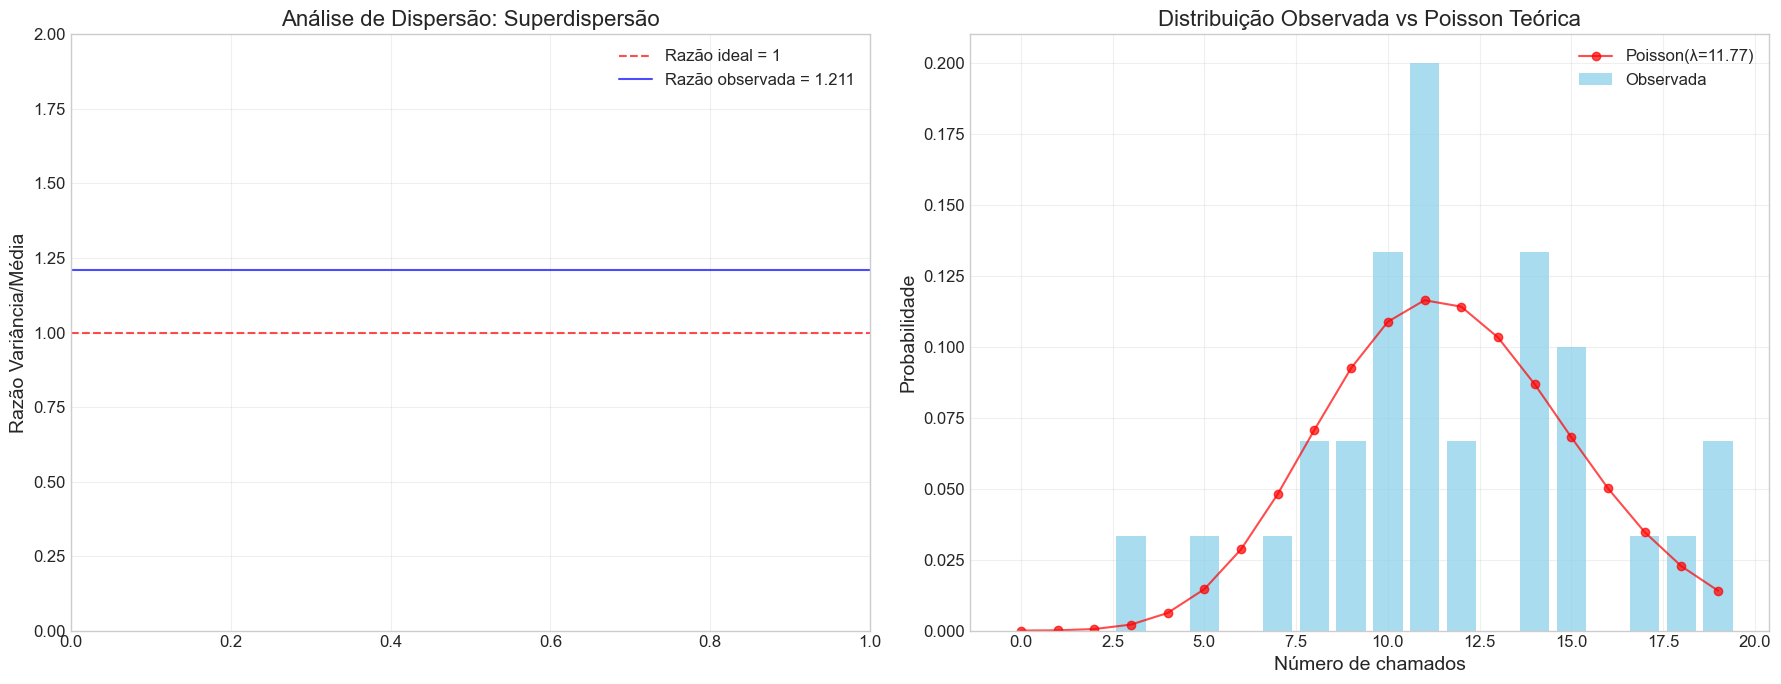


Teste Qui-quadrado de adequação:
Estatística χ²: 0.0002
GL: 0
p-valor: 0.9877
Conclusão: Não rejeitar o modelo Poisson (α=0.05)

Análise para Problemas de encanamento:
Média: 7.5667
Variância: 7.1789
Razão Variância/Média: 0.9488


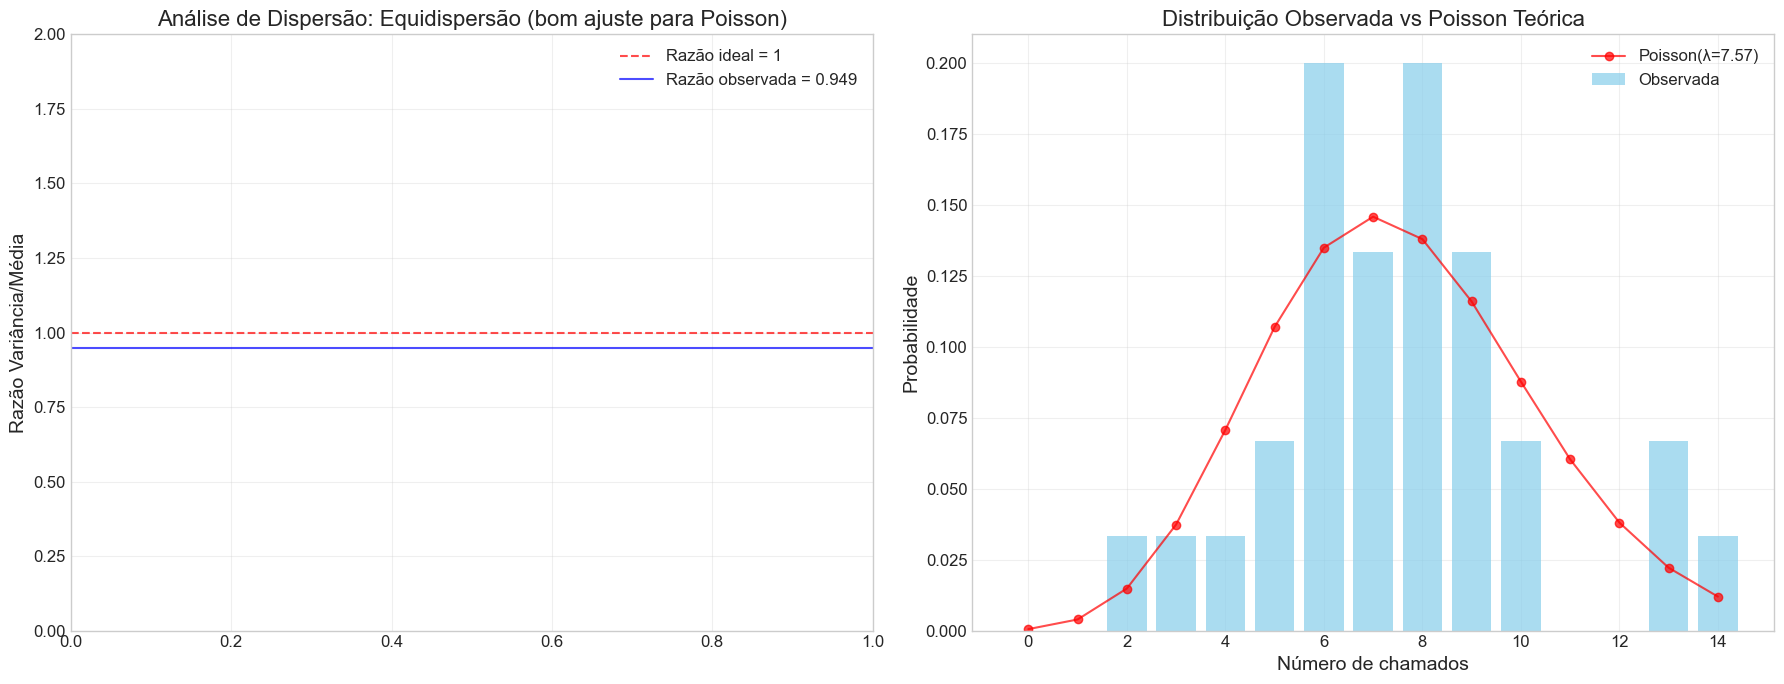


Teste Qui-quadrado de adequação:
Estatística χ²: 0.0157
GL: 0
p-valor: 0.9003
Conclusão: Não rejeitar o modelo Poisson (α=0.05)

Análise para Problemas elétricos:
Média: 4.0333
Variância: 3.0989
Razão Variância/Média: 0.7683


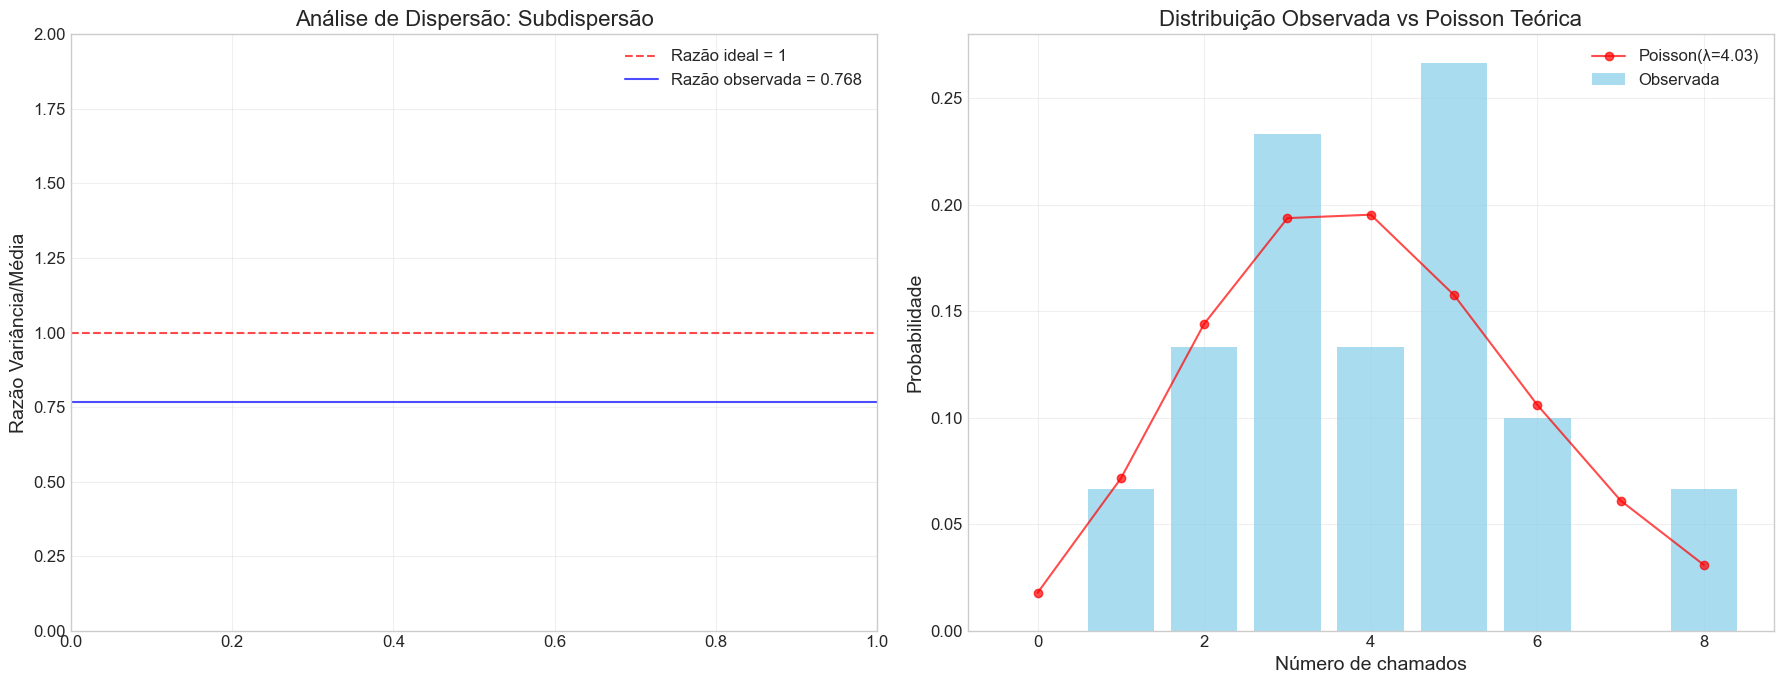


Teste Qui-quadrado de adequação:
Estatística χ²: 0.5536
GL: 0
p-valor: 0.4568
Conclusão: Não rejeitar o modelo Poisson (α=0.05)

Análise para Coleta de lixo:
Média: 14.5000
Variância: 19.1833
Razão Variância/Média: 1.3230


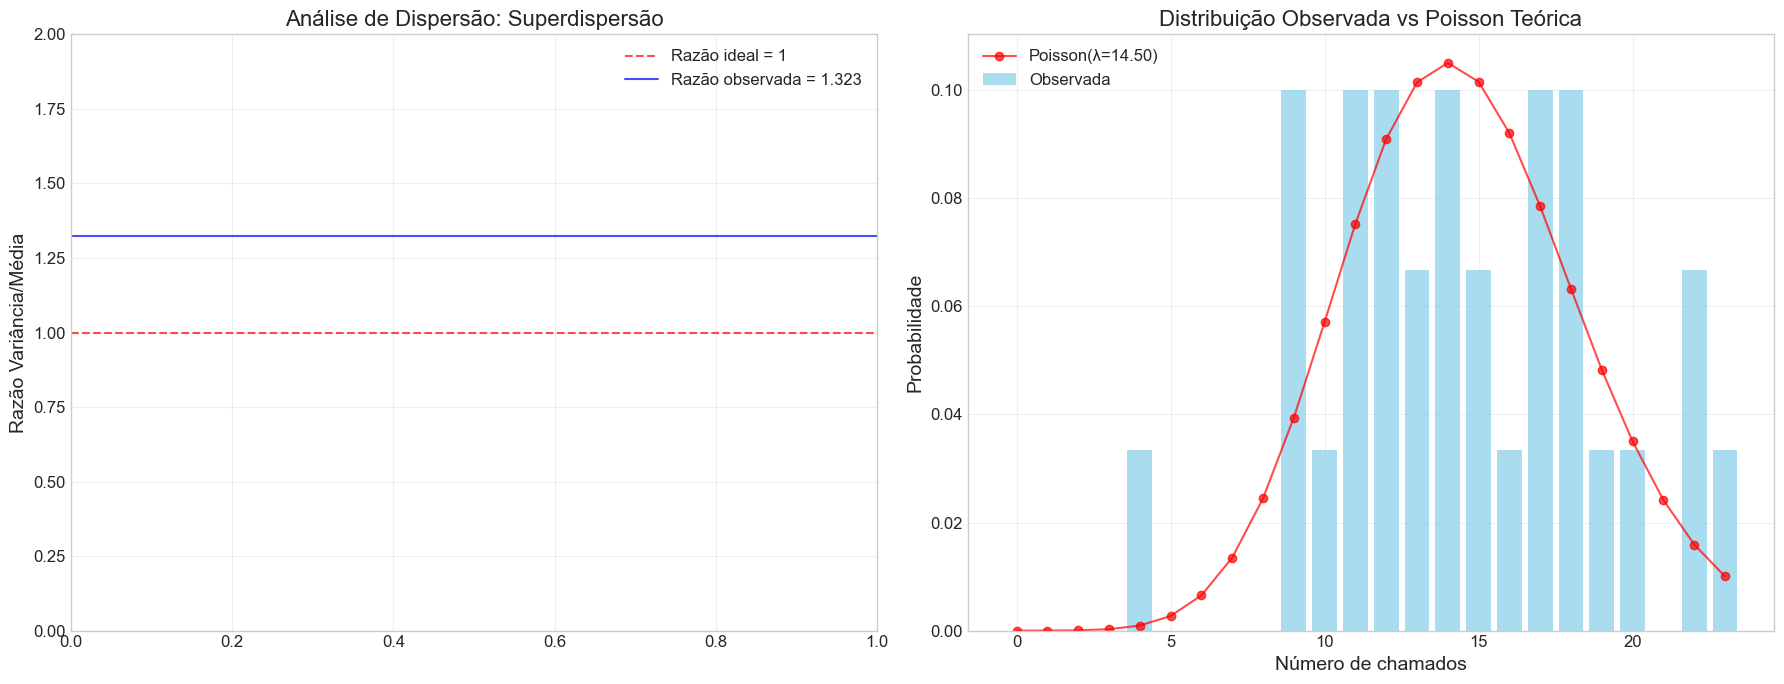


Teste Qui-quadrado de adequação:
Estatística χ²: 0.0000
GL: 0
p-valor: 0.9969
Conclusão: Não rejeitar o modelo Poisson (α=0.05)

Análise para Limpeza de ruas:
Média: 7.5667
Variância: 6.8456
Razão Variância/Média: 0.9047


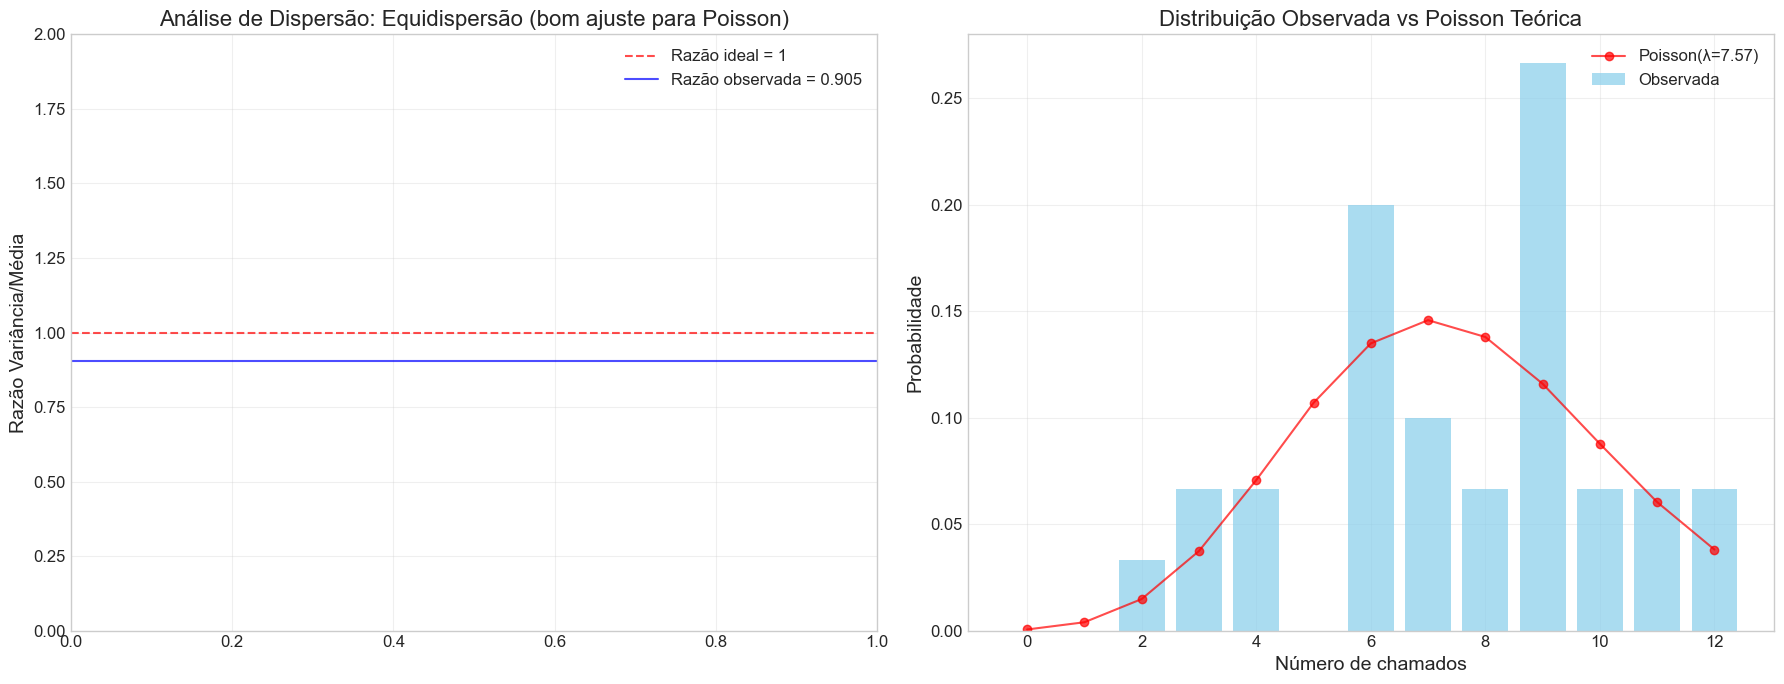


Teste Qui-quadrado de adequação:
Estatística χ²: 0.0163
GL: 0
p-valor: 0.8985
Conclusão: Não rejeitar o modelo Poisson (α=0.05)

Resumo do ajuste do modelo Poisson por categoria:


,Categoria,Var/Média,Ajuste Poisson
0,Ruído,1.210670,Ruim (superdispersão)
1,Problemas de encanamento,0.948752,Bom (equidispersão)
2,Problemas elétricos,0.768320,Ruim (subdispersão)
3,Coleta de lixo,1.322989,Ruim (superdispersão)
4,Limpeza de ruas,0.904699,Bom (equidispersão)


In [17]:
# Testar para cada categoria individual
model_tester.test_all_categories()

## 6. Extensões e Modelos Relacionados

### 6.1 Para lidar com superdispersão ou subdispersão:

- **Distribuição Binomial Negativa**: Útil quando a variância > média (superdispersão)
- **Modelos de Regressão Generalizada**: Poisson, quasi-Poisson, ou binomial negativa

### 6.2 Para processos de contagem heterogêneos:

- **Processo de Poisson não-homogêneo**: Taxa de eventos $\lambda(t)$ varia com o tempo
- **Processo de Cox**: Um processo de Poisson onde a taxa $\lambda(t)$ é um processo estocástico

### 6.3 Para processos com memória:

- **Processo de renovação**: Generalização onde os tempos entre chegadas têm distribuição arbitrária
- **Processo de Hawkes**: Modelo auto-excitável onde eventos passados aumentam a probabilidade de eventos futuros

## 7. Conclusões

### 7.1 Pontos-Chave

1. A distribuição de Poisson é fundamental para modelar contagens de eventos raros em intervalos fixos
2. Uma característica distinta é a igualdade entre média e variância (equidispersão)
3. A distribuição emerge naturalmente de limites de processos binomiais quando $n \to \infty$ e $p \to 0$
4. Para valores grandes de $\lambda$, a aproximação normal é adequada
5. Os processos de Poisson modelam sequências de eventos aleatórios independentes com taxa constante

### 7.2 Aplicações

- Modelagem de chamados de serviço (como visto no exemplo)
- Análise de acidentes raros em segurança industrial
- Estudos de mutações genéticas em biologia molecular
- Modelagem de tráfego de rede em telecomunicações
- Análise de transações financeiras (chegada de ordens em mercados)

### 7.3 Limitações e Considerações

1. A suposição de eventos independentes frequentemente não é realista em contextos reais
2. A equidispersão (média = variância) raramente é observada em dados empíricos
3. Taxas constantes podem ser uma simplificação excessiva para muitos fenômenos
4. Modelos mais sofisticados são necessários para fenômenos com clustering ou auto-excitação